We consider the problem of classifying text messages (such as costumer feedbacks) according to their sentiment. A data point is a one particular text snippet. The features of the data point are a numeric encoding of the text. The label is a number 1,..,5 which encodes a particular sentiment. In order to learn a classifier that takes the feature vector of a text and outputs a predicted label, we have some labeled data points in the file "train.tsv". Each line of this file contains one text snippet for which the sentiment is known. 

In [35]:
import csv
with open('train.tsv') as f:
    reader = csv.reader(f)
    your_list = list(reader)

print(your_list[:3])

[['PhraseId\tSentenceId\tPhrase\tSentiment'], ['1\t1\tA series of escapades demonstrating the adage that what is good for the goose is also good for the gander ', ' some of which occasionally amuses but none of which amounts to much of a story .\t1'], ['2\t1\tA series of escapades demonstrating the adage that what is good for the goose\t2']]


In [36]:
##
import pandas as pd
df=pd.read_csv('train.tsv', sep='\t')
df.iloc[:,3]
df.head() 

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [37]:
corpus = df['Phrase']
y = df['Sentiment']    # labal vector 


In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# compute numeric features for each text snippet 

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(X.toarray())  # the matrix X contains the feature vectors for each text snippet 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [39]:
m = X.shape[0]
n = X.shape[1]
print("number of data points m=",m)
print("\n number of features n=",n)

number of data points m= 156060

 number of features n= 15240


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
#ros = RandomOverSampler(random_state=0)
#X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train, y_train)

print("test-set",clf.score(X_test,y_test))
print("train-set",clf.score(X_train,y_train))


/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.

test-set 0.6276944764834038
train-set 0.7093425605536332


/Users/alexanderjung/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [41]:
from sklearn.cluster import KMeans
from sklearn.utils import shuffle

#X=X[:1000,:100]
#kmeans = KMeans(n_clusters=5, max_iter=10, random_state=0).fit(X)

In [42]:
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
svd.fit(X)

Z=svd.transform(X)


In [43]:
print(Z.shape)

(156060, 2)


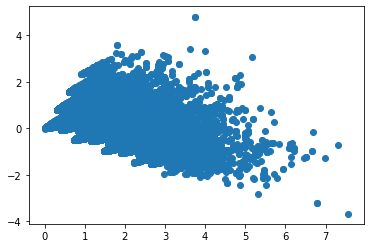

In [44]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Z[:,0],Z[:,1])
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5, max_iter=10, random_state=0).fit(Z)